In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

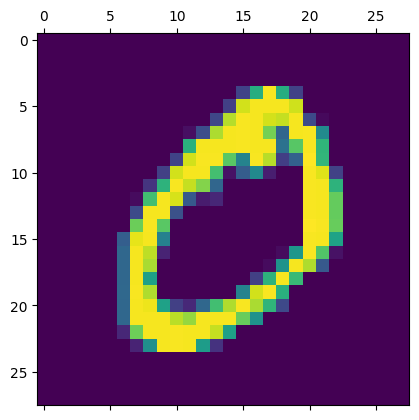

In [4]:
plt.matshow(X_train[1])

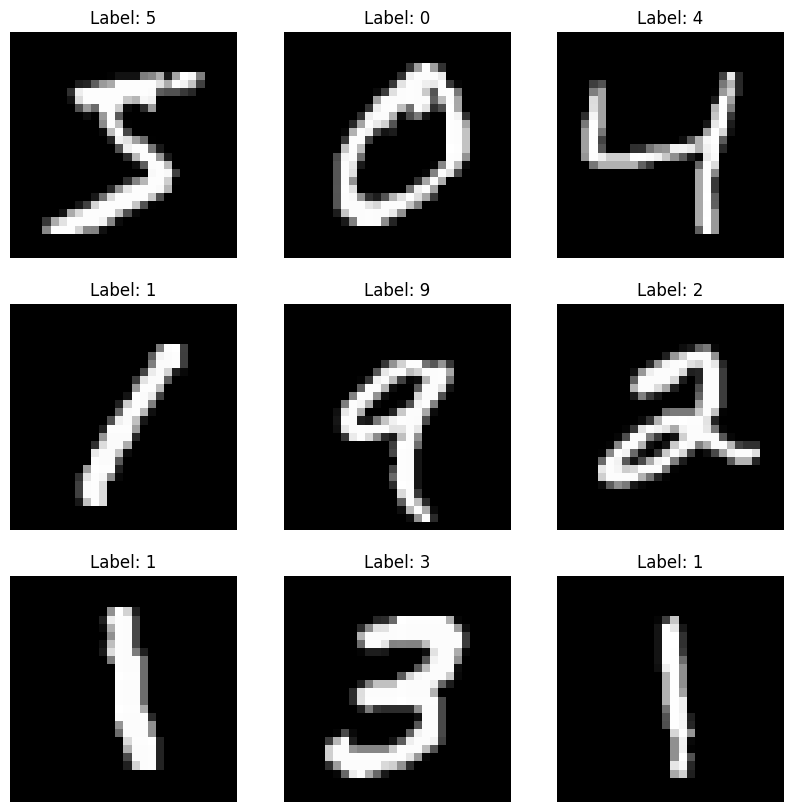

In [5]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Normalizing image pixel values to [0, 1]

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Reshaping images to (28, 28, 1) because for grayscale images like MNIST, the channel dimension is 1.

In [8]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

Convertion labels to one-hot encoding is essentioal beause problem involves multiple classes and a loss function like categorical_crossentropy. 

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
from sklearn.model_selection import train_test_split
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Data Augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

Building the CNN Mode

In [12]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(28, 28, 1)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [15]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30


c:\Users\Shiva\OneDrive\Desktop\cardekho\car_price_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7116 - loss: 0.8705 - val_accuracy: 0.9777 - val_loss: 0.0688 - learning_rate: 0.0010
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9343 - loss: 0.2121 - val_accuracy: 0.9859 - val_loss: 0.0449 - learning_rate: 0.0010
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9549 - loss: 0.1529 - val_accuracy: 0.9858 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9592 - loss: 0.1319 - val_accuracy: 0.9889 - val_loss: 0.0347 - learning_rate: 0.0010
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9655 - loss: 0.1151 - val_accuracy: 0.9902 - val_loss: 0.0317 - learning_rate: 0.0010
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9708 - loss: 0.0979 - val_accuracy: 0.9896 - val_loss: 0.0334 - learning_rate: 0.0010
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9748 - loss: 0.0880

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9937 - loss: 0.0167
Test Accuracy: 0.9946, Test Loss: 0.0153


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
print(classification_report(y_true, y_pred_classes, digits=4))

              precision    recall  f1-score   support

           0     0.9969    0.9959    0.9964       980
           1     0.9965    0.9956    0.9960      1135
           2     0.9961    0.9952    0.9956      1032
           3     0.9912    1.0000    0.9956      1010
           4     0.9939    0.9959    0.9949       982
           5     0.9966    0.9922    0.9944       892
           6     0.9968    0.9896    0.9932       958
           7     0.9894    0.9961    0.9927      1028
           8     0.9938    0.9949    0.9944       974
           9     0.9950    0.9901    0.9925      1009

    accuracy                         0.9946     10000
   macro avg     0.9946    0.9945    0.9946     10000
weighted avg     0.9946    0.9946    0.9946     10000



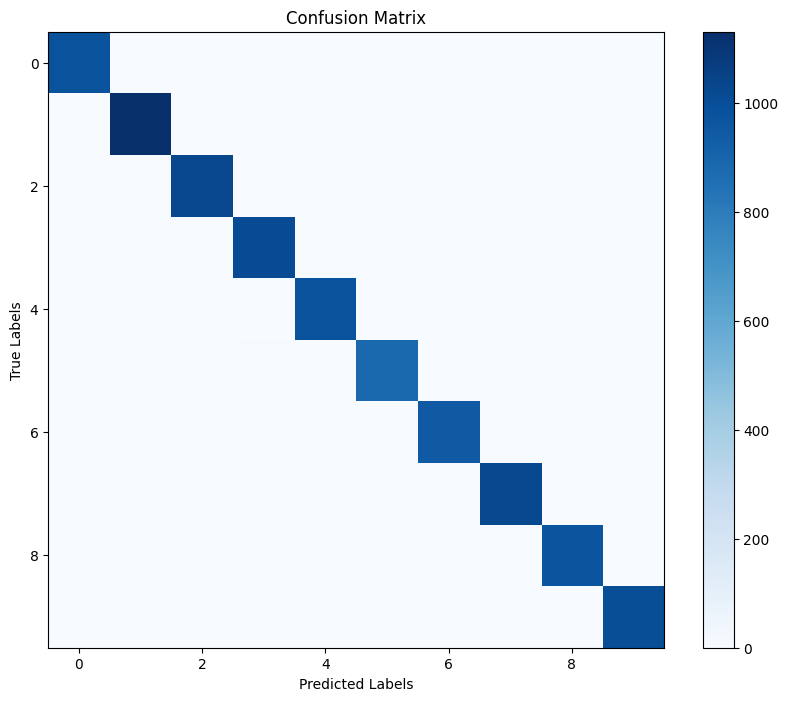

In [19]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

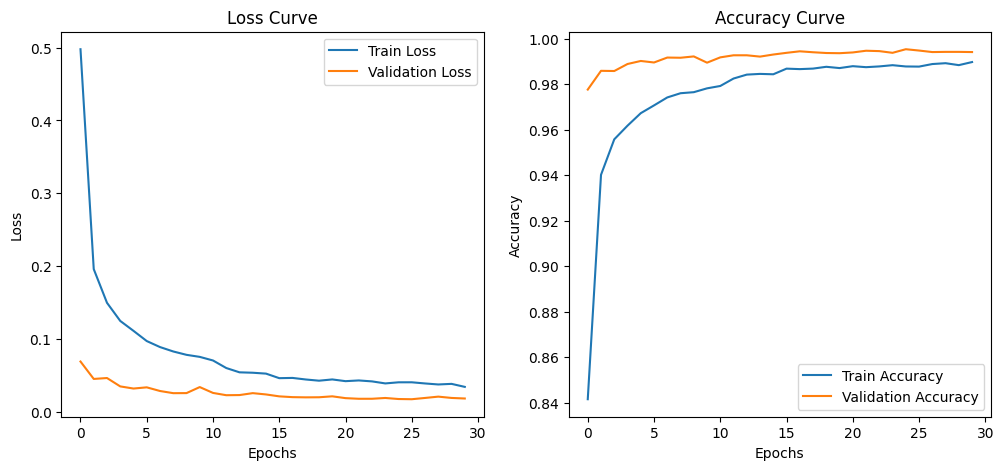

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()